# 🔢 Softmax Regression for Multi-Class Classification

This notebook implements a **Softmax Regression model** (also known as **Multinomial Logistic Regression**) from scratch using **NumPy** to classify handwritten digits **(0–9)**.

---

## 1. Data Preprocessing

To prepare the digits dataset for our model, we perform three essential steps:

### 🔹 Normalization
The raw pixel values range from **0 to 16**.  
We divide each value by **16.0** to scale them into the range **[0, 1]**.  
This scaling helps **Gradient Descent converge faster and more reliably**.

$$
X_{\text{normalized}} = \frac{X}{16.0}
$$

---

### 🔹 One-Hot Encoding
Since this is a **multi-class problem (10 classes)**, the target labels cannot be represented as a single integer.

Each digit label is converted into a **10-dimensional vector**.

**Example:**  
Digit `3` →

$$
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
$$

---

### 🔹 Train-Test Split
We reserve **20% of the dataset** for testing to ensure the model generalizes well to **unseen data**.

---

## 2. The Softmax Function

In binary classification, we use the **Sigmoid** function.  
For multi-class classification, we use the **Softmax** function.

Softmax converts raw scores (logits) into a **probability distribution** across all classes.

### 📐 Mathematical Formula
$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

### 🔑 Key Properties
- Each output value lies between **0 and 1**
- The sum of all outputs equals **1.0**

---

### ⚠️ Numerical Stability
To avoid overflow caused by large exponent values, we subtract the maximum logit before exponentiation:

$$
z \leftarrow z - \max(z)
$$

---

## 3. Categorical Cross-Entropy Loss

To measure how incorrect the model’s predictions are, we use **Categorical Cross-Entropy Loss**.

It compares the **predicted probability distribution** with the **true one-hot encoded labels**.

### 📐 Mathematical Formula
$$
J(W) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{ik} \log(\hat{y}_{ik})
$$

### 📉 Interpretation
- High probability for the correct class → **Low loss**
- High confidence in the wrong class → **Large loss**

---

## 4. Training Mechanism (Gradient Descent)

The model learns by iteratively updating its **weights** \(W\) and **bias** \(b\).

### 🔄 Training Steps

#### 1️⃣ Forward Pass
$$
Z = XW + b
$$
Apply Softmax to get predictions:
$$
\hat{y} = \text{Softmax}(Z)
$$

---

#### 2️⃣ Compute Error
$$
dZ = \hat{y} - y
$$

---

#### 3️⃣ Gradient Calculation
- Weight Gradient:
$$
dW = \frac{1}{m} X^T \cdot dZ
$$
- Bias Gradient:
$$
db = \text{mean}(dZ)
$$

---

#### 4️⃣ Parameter Update
$$
W = W - \eta \cdot dW
$$
$$
b = b - \eta \cdot db
$$

where $ \eta $ is the **learning rate**.

---

## 5. Model Evaluation: Argmax

After training, the model outputs **10 probabilities** for each image.

To obtain the final predicted digit, we use:

$$
\text{Prediction} = \text{argmax}(\hat{y})
$$

This selects the digit (0–9) with the **highest predicted probability**.

---

## 🚀 Summary of Model Parameters

- **Number of Features:** 64 (8×8 pixel grid)
- **Number of Classes:** 10 (digits 0–9)
- **Weight Matrix \(W\):** Shape (64, 10)
- **Bias Vector \(b\):** Shape (1, 10)
- **Optimization Method:** Gradient Descent
- **Loss Function:** Categorical Cross-Entropy

---

This implementation provides a clear understanding of how **multiclass classification works internally**, without relying on machine learning libraries.


Epoch 000| Loss: 2.2980|Train Acc:0.1267
Epoch 050| Loss: 0.6325|Train Acc:0.9255
Epoch 100| Loss: 0.4106|Train Acc:0.9429
Epoch 150| Loss: 0.3248|Train Acc:0.9485
Epoch 200| Loss: 0.2774|Train Acc:0.9541
Epoch 250| Loss: 0.2465|Train Acc:0.9582
Epoch 300| Loss: 0.2245|Train Acc:0.9596
Epoch 350| Loss: 0.2077|Train Acc:0.9624
Epoch 400| Loss: 0.1944|Train Acc:0.9659
Epoch 450| Loss: 0.1835|Train Acc:0.9687

 Final test Accuracy: 96.11%


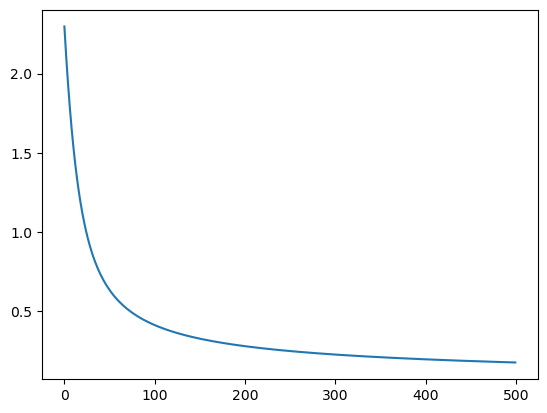

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# Load and prepare datasets
digits = load_digits()
X,y = digits.data, digits.target
# Normalize features (Digits pixel values are 0-16)
X = X/16.0
# One-hot encode targets
num_classes = 10
y_onehot = np.zeros((y.size,num_classes))
y_onehot[np.arange(y.size),y]=1

# Train-test-split
X_train,X_test,y_train,y_test = train_test_split(
    X,y_onehot,test_size = 0.2, random_state = 42
)

# Define softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z,axis=1,keepdims=True))
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)
def cross_entropy(y_true,y_pred):
    m = y_true.shape[0]
    # Small epsilon to avoid log(0)
    return (-1/m)*np.sum(y_true*np.log(y_pred+1e-9))

# Initialize model parameters
np.random.seed(0)
n_samples = X_train.shape[0]
n_features = X_train.shape[1] # FIX: Use index 1 for features (64 pixels)

# Initialize W and b
W = np.random.randn(n_features,num_classes)*0.01
b = np.zeros((1,num_classes))

learning_rate = 0.5 # Increased slightly for faster convergence
epochs = 500
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    logits = np.dot(X_train,W) + b
    y_pred = softmax(logits)
    
    # loss
    loss = cross_entropy(y_train,y_pred)
    loss_history.append(loss)
    
    # Gradients
    dZ = y_pred - y_train
    dW = np.dot(X_train.T,dZ)/n_samples
    db = np.mean(dZ,axis=0,keepdims=True)
    
    W -= learning_rate*dW
    b -= learning_rate*db
    
    if epoch%50==0:
        # Calculate current accuracy
        current_acc = np.mean(np.argmax(y_pred,axis=1)==
                              np.argmax(y_train,axis=1))
        print(f"Epoch {epoch:03d}| Loss: {loss:.4f}|Train Acc:{current_acc:.4f}")
        
#  Evaluate the model
test_logits = np.dot(X_test,W) + b 
test_pred = softmax(test_logits)

y_test_labels = np.argmax(y_test,axis=1)
y_pred_labels = np.argmax(test_pred,axis=1)

accuracy = np.mean(y_test_labels == y_pred_labels)
print(f"\n Final test Accuracy: {accuracy*100:.2f}%")
    
plt.plot(loss_history)

### The Confusion Matrix and Misclassified Visualization

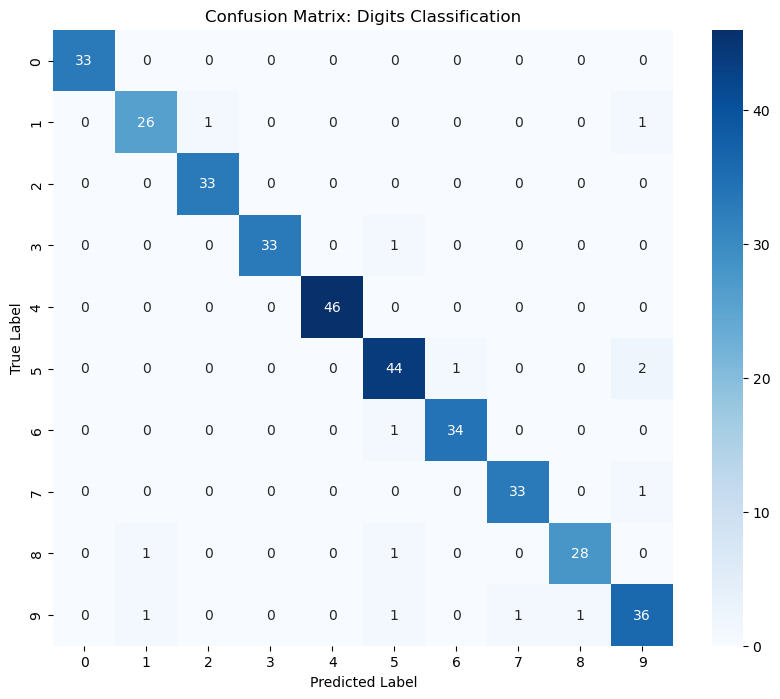

Total Misclassified: 14 out of 360


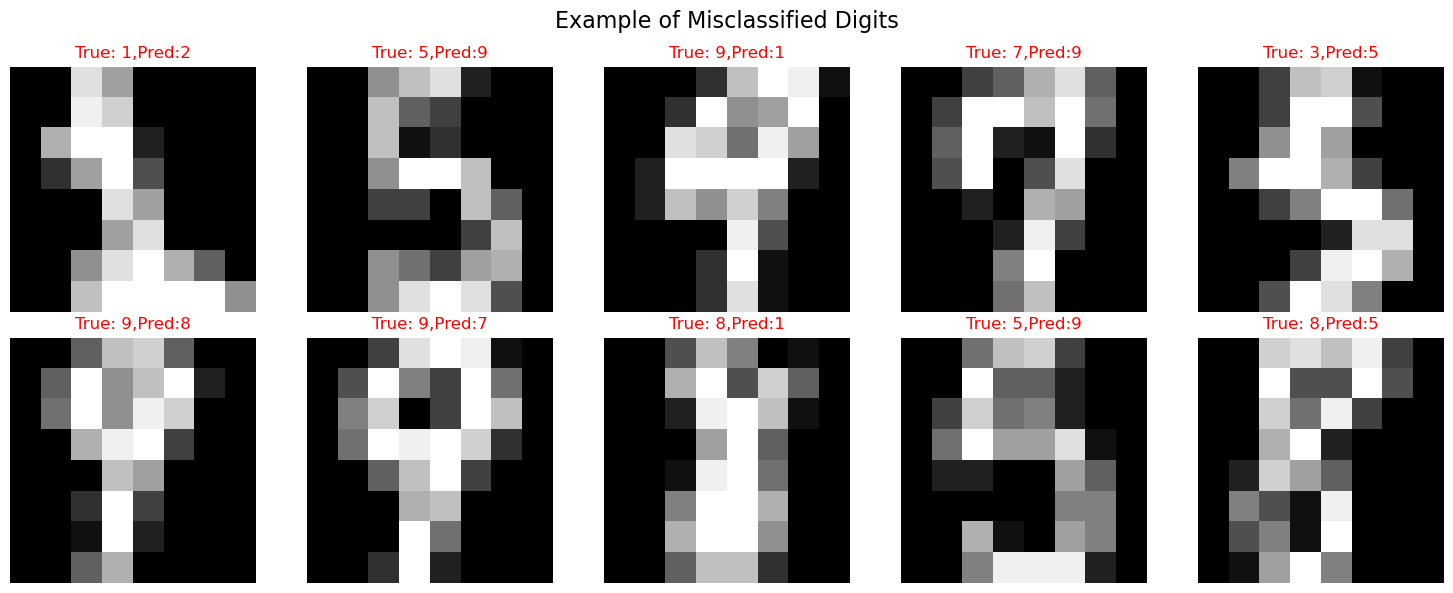

In [117]:
import seaborn as sns
# confusion matrix from scratch
def create_confusion_matrix(y_true,y_pred,num_class=10):
    cm = np.zeros((num_classes,num_classes),dtype=int)
    for t,p in zip(y_true,y_pred):
        cm[t,p] += 1
    return cm

conf_matrix = create_confusion_matrix(y_test_labels,y_pred_labels)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Digits Classification')
plt.show()

# --- 2. Visualize Misclassified Digits ---
# Find indices where the prediction does not match the truth
misclassified_idx = np.where(y_test_labels != y_pred_labels)[0]

print(f"Total Misclassified: {len(misclassified_idx)} out of {len(y_test_labels)}")

# Plot the first 10 misclassified digits
plt.figure(figsize=(15,6))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2,5,i+1)
    # Reshape the 64-pixle vector back to 8x8 for display
    plt.imshow(X_test[idx].reshape(8,8),cmap="gray")
    plt.title(f"True: {y_test_labels[idx]},Pred:{y_pred_labels[idx]}",color="red")
    plt.axis("off")
    
plt.suptitle("Example of Misclassified Digits",fontsize=16)
plt.tight_layout()
plt.show()

### 🐍 Softmax Regression: The OOP Implementation
This implementation encapsulates the logic into a SoftmaxRegression class, including L2 Regularization and a history tracker for analysis.

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

Epoch 000| Loss: 2.2997
Epoch 100| Loss: 0.4111
Epoch 200| Loss: 0.2781
Epoch 300| Loss: 0.2253
Epoch 400| Loss: 0.1953

 Final Test Accuracy :96.11%


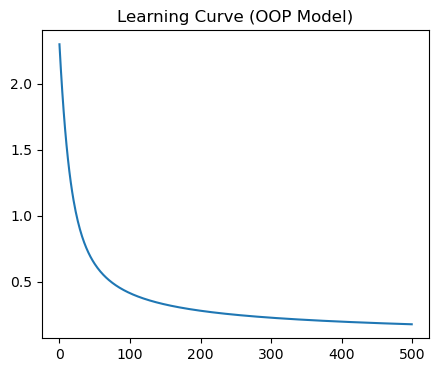

In [123]:
class SoftmaxRegression:
    def __init__(self,lr=0.1,epochs=500,lambda_reg = 0.1):
        self.lr = lr
        self.epochs = epochs
        self.lambda_reg =lambda_reg
        self.W = None
        self.b = None
        self.loss_history = []
        
    def _softmax(self,z):
        exp_z = np.exp(z - np.max(z,axis=1,keepdims=True))
        return exp_z/np.sum(exp_z,axis=1,keepdims=True)
    def _compute_loss(self,X,y,y_pred):
        m = X.shape[0]
        cross_entropy = (-1/m)*np.sum(y*np.log(y_pred+1e-9))
        # L2 Regularization Penalty
        l2_penalty = (self.lambda_reg/(2*m))*np.sum(np.square(self.W))
        return cross_entropy+l2_penalty
    def fit(self,X,y):
        n_samples, n_features = X.shape
        n_classes = y.shape[1]
        # Initialize parameters
        self.W = np.random.randn(n_features,n_classes)*0.01
        self.b = np.zeros((1,n_classes))
        
        for epoch in range(epochs):
            # Forward pass
            logits = np.dot(X,self.W) + self.b
            y_pred = self._softmax(logits)
            # compute loss
            loss = self._compute_loss(X,y,y_pred)
            self.loss_history.append(loss)
            # Backward pass (Gradients)
            dZ = y_pred - y
            dW = ((1/n_samples)* np.dot(X.T,dZ)) + (1/n_samples)*self.lambda_reg*self.W
            db = np.mean(dZ,axis=0,keepdims=True)
            
            # Update the parameters
            self.W -= self.lr*dW
            self.b -= self.lr*db
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch:03d}| Loss: {loss:.4f}")
                
    def predict_proba(self,X):
        logits = np.dot(X,self.W) + self.b
        return self._softmax(logits)
    def predict(self,X):
        probas = self.predict_proba(X)
        return np.argmax(probas,axis=1)
    def score(self,X,y_true_labels):
        y_pred = self.predict(X)
        return np.mean(y_pred==y_true_labels)
    
# Data preparation 
digits = load_digits()
X,y = digits.data/16.0, digits.target
y_onehot = np.eye(10)[y] # Quick way to one-hot encode

X_train,X_test,y_train_oh,y_test_oh = train_test_split(X,y_onehot,test_size=0.2,random_state=42)
y_test_labels = np.argmax(y_test_oh,axis=1)

# Train the model
model = SoftmaxRegression(lr=0.5,epochs=500,lambda_reg=0.01)
model.fit(X_train,y_train_oh)

# Evaluation and Visualization 
accuracy = model.score(X_test,y_test_labels)
print(f"\n Final Test Accuracy :{accuracy*100:.2f}%")

# Plot loss
plt.figure(figsize=(5,4))
plt.plot(model.loss_history)
plt.title("Learning Curve (OOP Model)")
plt.show()

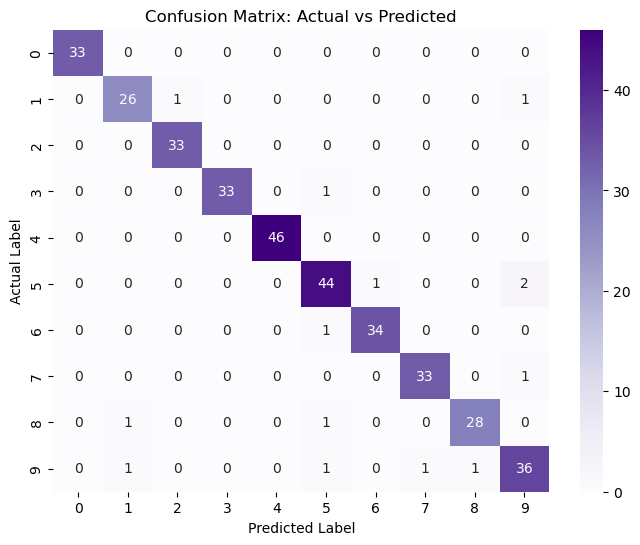

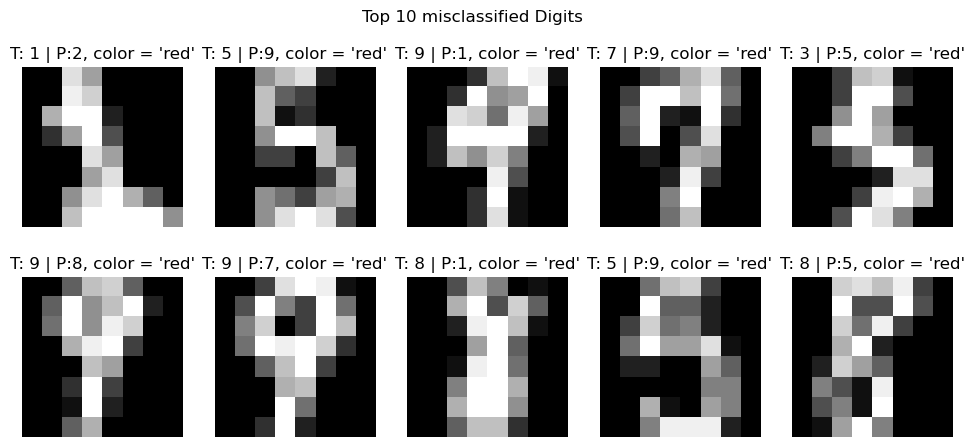

In [124]:
# Confusion Matrix 
y_pred_labels = model.predict(X_test)

def plot_confusion_matrix(y_true,y_pred):
    cm = np.zeros((10,10),dtype=int)
    for t,p in zip(y_true,y_pred):
        cm[t,p]+=1
        
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt="d",cmap="Purples")
    plt.title("Confusion Matrix: Actual vs Predicted")
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
plot_confusion_matrix(y_test_labels,y_pred_labels)

#  Visuallize Misclassified Digits
mis_idx = np.where(y_test_labels!=y_pred_labels)[0]

plt.figure(figsize=(12,5))
for i, idx in enumerate(mis_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx].reshape(8,8),cmap="gray")
    plt.title(f"T: {y_test_labels[idx]} | P:{y_pred_labels[idx]}, color = 'red'")
    plt.axis('off')
    
    
plt.suptitle("Top 10 misclassified Digits")
plt.show()
